<a href="https://colab.research.google.com/github/ypsmalik/covid_vaccine_analysis/blob/main/Covid_Vaccine_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pywaffle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.6/25.6 MB 29.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from wordcloud import WordCloud,ImageColorGenerator
init_notebook_mode(connected=True)
from plotly.subplots import make_subplots
from pywaffle import Waffle
import warnings
warnings.filterwarnings("ignore")
init_notebook_mode(connected=True)

Reading the data from csv

In [ ]:
df = pd.read_csv("/content/country_vaccinations.csv")

In [ ]:
new_df = df.groupby(['country', 'iso_code', 'vaccines'])[['total_vaccinations',
                     'people_vaccinated','people_fully_vaccinated',
                    'daily_vaccinations','total_vaccinations_per_hundred',
                    'people_vaccinated_per_hundred',"people_fully_vaccinated_per_hundred",'daily_vaccinations_per_million']].max().reset_index()


print(new_df.head())

       country iso_code                                           vaccines  \
0  Afghanistan      AFG  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
1      Albania      ALB  Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...   
2      Algeria      DZA  Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...   
3      Andorra      AND       Moderna, Oxford/AstraZeneca, Pfizer/BioNTech   
4       Angola      AGO                                 Oxford/AstraZeneca   

   total_vaccinations  people_vaccinated  people_fully_vaccinated  \
0           5751015.0          5082824.0                4420127.0   
1           2754244.0          1278902.0                1215199.0   
2          13704895.0          7461932.0                6110712.0   
3            151997.0            57817.0                  53367.0   
4          17535411.0         11235059.0                5993792.0   

   daily_vaccinations  total_vaccinations_per_hundred  \
0             70761.0                           14.44   
1 


What is the proportion of Top 10 vaccines in the race of fighting Covid 19?

In [ ]:
top10 = new_df['vaccines'].value_counts().nlargest(10)
top10

vaccines
Oxford/AstraZeneca                                                         20
Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech              17
Moderna, Oxford/AstraZeneca, Pfizer/BioNTech                               15
Oxford/AstraZeneca, Pfizer/BioNTech                                        11
Johnson&Johnson, Moderna, Novavax, Oxford/AstraZeneca, Pfizer/BioNTech      8
Johnson&Johnson, Oxford/AstraZeneca, Sinopharm/Beijing                      7
Pfizer/BioNTech                                                             7
Moderna, Pfizer/BioNTech                                                    6
Johnson&Johnson, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing     5
Oxford/AstraZeneca, Sinopharm/Beijing                                       5
Name: count, dtype: int64

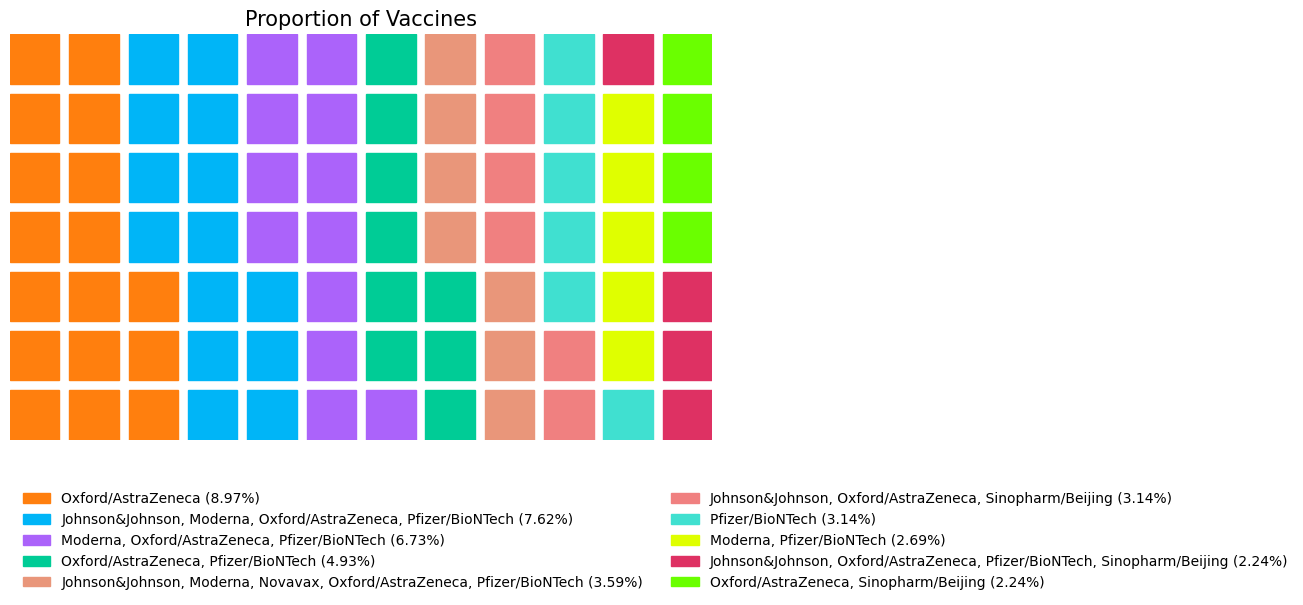

In [ ]:
data = dict(new_df['vaccines'].value_counts(normalize = True).nlargest(10)*100)                                  #dict(new_df['vaccines'].value_counts(normalize = True) * 100)
vaccine = ['Oxford/AstraZeneca', 'Moderna, Oxford/AstraZeneca, Pfizer/BioNTech',
       'Oxford/AstraZeneca, Pfizer/BioNTech',
       'Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech',
       'Pfizer/BioNTech', 'Sputnik V', 'Oxford/AstraZeneca, Sinopharm/Beijing',
       'Sinopharm/Beijing', 'Moderna, Pfizer/BioNTech',
       'Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac']
fig = plt.figure(
    rows=7,
    columns=12,
    FigureClass = Waffle,
    values = data,
    title={'label': 'Proportion of Vaccines', 'loc': 'center',
          'fontsize':15},
    colors=("#FF7F0E", "#00B5F7", "#AB63FA","#00CC96","#E9967A","#F08080","#40E0D0","#DFFF00","#DE3163","#6AFF00"),
    labels=[f"{k} ({v:.2f}%)" for k, v in data.items()],
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': 2, 'framealpha': 0},
    figsize=(12, 9)
)
fig.show()

The number of total vaccinations and daily vaccinations according to countries

In [ ]:
!pip install --upgrade plotly

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.io as pio

# Set renderer for Google Colab
pio.renderers.default = 'colab'

# Assuming new_df is your DataFrame and contains the relevant data
# Ensure new_df is defined elsewhere in your script or notebook

# Prepare the data
data = new_df[['country', 'daily_vaccinations']].nlargest(25, 'daily_vaccinations')

# Create the bar chart
fig = px.bar(data,
             x='country',
             y='daily_vaccinations',
             title="Number of Daily Vaccinations by Country",
             labels={'daily_vaccinations': 'Daily Vaccinations', 'country': 'Country'},
             template='plotly_white')

# Show the plot
fig.show()

In [ ]:
data.describe()

,daily_vaccinations
count,2.500000e+01
mean,2.620922e+06
std,4.542411e+06
min,5.852160e+05
25%,8.461790e+05
50%,1.264431e+06
75%,1.941268e+06
max,2.242429e+07


In [ ]:
data = new_df[['country','total_vaccinations']].nlargest(25,'total_vaccinations')
data['total_vaccinations'] = data['total_vaccinations']/1000000000
print(data.head())
fig = px.bar(data, x = 'country',y = 'total_vaccinations',title="Number of total vaccinations according to countries",)
fig.update_layout(yaxis=dict(range=[0, max(data['total_vaccinations']) * 1.5]))
fig.show()

           country  total_vaccinations
41           China            3.263129
91           India            1.834501
212  United States            0.560182
27          Brazil            0.413560
92       Indonesia            0.377109


which vaccine used by which country

In [ ]:
vacc = new_df["vaccines"].unique()
for i in vacc:
    c = list(new_df[new_df["vaccines"] == i]['country'])
    print(f"Vaccine: {i}nUsed countries: \n{c}")
print(vacc)

Vaccine: Johnson&Johnson, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/BeijingnUsed countries: 
['Afghanistan', 'Belize', 'Cameroon', 'Namibia', 'Trinidad and Tobago']
Vaccine: Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, Sputnik VnUsed countries: 
['Albania', 'Azerbaijan', 'Bosnia and Herzegovina', 'Oman']
Vaccine: Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac, Sputnik VnUsed countries: 
['Algeria', 'Zimbabwe']
Vaccine: Moderna, Oxford/AstraZeneca, Pfizer/BioNTechnUsed countries: 
['Andorra', 'Australia', 'England', 'Fiji', 'Finland', 'Guernsey', 'Isle of Man', 'Japan', 'Jersey', 'Northern Ireland', 'Scotland', 'Sint Maarten (Dutch part)', 'Sweden', 'United Kingdom', 'Wales']
Vaccine: Oxford/AstraZenecanUsed countries: 
['Angola', 'Democratic Republic of Congo', 'Falkland Islands', 'Kiribati', 'Liberia', 'Mali', 'Montserrat', 'Nauru', 'Nigeria', 'Papua New Guinea', 'Pitcairn', 'Saint Helena', 'Saint Vincent and the Grenadines', 'Samoa', 'Sao Tome and Principe', 'Solomon Islands', 

In [ ]:
fig = px.choropleth(new_df,locations = 'country',locationmode = 'country names',color = 'vaccines',
                   title = 'Vaccines used by specefic Country',hover_data= ['total_vaccinations'])
fig.show()

Total Vaccines per country goruped by vaccines


In [ ]:
fig = px.treemap(new_df,names = 'country',values = 'total_vaccinations',
                 path = ['vaccines','country'],
                 title="Total Vaccinations per country grouped by Vaccines",
                 color_discrete_sequence =px.colors.qualitative.Set1)
fig.show()

In [ ]:
fig = go.Choropleth(locations = new_df["country"],locationmode = 'country names',
                    z = new_df['total_vaccinations'],
                    text= new_df['country'],colorbar = dict(title= "Total Vaccinations"))
data = [fig]
layout = go.Layout(title = 'Total Vaccinations per Country')
fig = dict(data = data,layout = layout)
iplot(fig)

Daily vaccinations per country

In [ ]:
fig = go.Choropleth(locations = new_df["country"],locationmode = 'country names',
                    z = new_df['daily_vaccinations'],
                    text= new_df['country'],colorbar = dict(title= "Daily Vaccinations"))
data = [fig]
layout = go.Layout(title = 'Daily Vaccinations per Countries')
fig = dict(data = data,layout = layout)
iplot(fig)

Which vaccine is used in most countries?

In [ ]:
vaccine = new_df["vaccines"].value_counts().reset_index()
vaccine.columns = ['Vaccines','Number of Country']
vaccine.nlargest(5,"Number of Country")

,Vaccines,Number of Country
0,Oxford/AstraZeneca,20
1,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",17
2,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",15
3,"Oxford/AstraZeneca, Pfizer/BioNTech",11
4,"Johnson&Johnson, Moderna, Novavax, Oxford/Astr...",8


In [ ]:
import plotly.express as px
import pandas as pd
countries = ['Argentina', 'Austria', 'Belgium', 'Brazil','Canada','China','Czechia',
             'Denmark', 'England','Finland', 'France','Germany','India','Ireland',
             'Israel', 'Italy', 'Kuwait','Mexico', 'Netherlands','Norway', 'Poland',
             'Russia','Saudi Arabia', 'Scotland','Singapore','Spain', 'Sweden',
             'Switzerland', 'Turkey','United Arab Emirates', 'United Kingdom', 'United States']

def plot_trend(df, column, title, countries):
    df_filtered = df[df['country'].isin(countries)]

    fig = px.line(df_filtered, x='date', y=column, color='country',
                  title=title,
                  labels={column: 'Total Vaccinations', 'date': 'Date'})

    fig.update_layout(
        xaxis_title='Date',
        yaxis_title='Total Vaccinations',
        legend_title='Country',
        template='plotly_white'
    )

    fig.show()

plot_trend(df, 'total_vaccinations', 'Trend of Total Vaccination', countries)